os 활용에 관해 참고    
: https://yuls-with-ai.tistory.com/214

In [2]:
# os (Operating System)는 운영체제에서 제공되는 여러 기능을 파이썬에서 수행
import os

# 현재 작업중인 파일경로 확인
os.getcwd()
# 디렉토리 변경하고 싶다면
# os.chdir(path)

'c:\\Users\\and_c\\문서\\GitHub\\GAcustomerprediction'

데이터 불러오기 및 확인

In [84]:
#데이터 불러오기
import pandas as pd

df = pd.read_csv('C://Users//and_c//Desktop//sparta_ga4//train_df.csv', low_memory = False)

In [153]:
# 해당 값 전체 보기
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
# 복구
# pd.reset_option('display.max_colwidth')
# pd.reset_option('display.max_rows')

In [5]:
df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   channelGrouping                                    903653 non-null  object 
 1   date                                               903653 non-null  int64  
 2   fullVisitorId                                      903653 non-null  object 
 3   sessionId                                          903653 non-null  object 
 4   socialEngagementType                               903653 non-null  object 
 5   visitId                                            903653 non-null  int64  
 6   visitNumber                                        903653 non-null  int64  
 7   visitStartTime                                     903653 non-null  int64  
 8   device_browser                                     903653 non-null  object

In [ ]:
#

**사용할 데이터 칼럼 정리**
- **fullVisitorId : 사용자 구분 Id**
- **channelGrouping : 사이트의 들어온 경로를 의미**    
    'Organic Search', 'Referral','Paid Search', 'Affiliates','Direct', 'Display', 'Social', '(Other)'     
- **Device : 접속한 브라우저 명, 접속한 기기 등의 정보**        
    browser , operatingSystem, deviceCategory
- **geoNetwork : 접속이 발생한 지역의 정보**    
    continent, subContinent, country
- **totals : 웹페이지와의 상호작용**    
    bounce, hits, newVisits, pageviews, transactionRevenue, visits
- **traficSource : 접속 트래픽 정보**
- **visitStartTime : 접속한 시간 (posix타임)**

필요한 칼럼만 따로 df[]만들기

In [155]:
df[['fullVisitorId','channelGrouping',
    'device_browser','device_operatingSystem','device_deviceCategory',
    'geoNetwork_continent','geoNetwork_subContinent','geoNetwork_country',
    'totals_visits','totals_hits','totals_bounces','totals_newVisits','totals_transactionRevenue',
    'trafficSource_source','trafficSource_medium']].head()

,fullVisitorId,channelGrouping,device_browser,device_operatingSystem,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,totals_visits,totals_hits,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_source,trafficSource_medium
0,1131660440785968503,Organic Search,Chrome,Windows,desktop,Asia,Western Asia,Turkey,1,1,1.0,1.0,NaN,google,organic
1,377306020877927890,Organic Search,Firefox,Macintosh,desktop,Oceania,Australasia,Australia,1,1,1.0,1.0,NaN,google,organic
2,3895546263509774583,Organic Search,Chrome,Windows,desktop,Europe,Southern Europe,Spain,1,1,1.0,1.0,NaN,google,organic
3,4763447161404445595,Organic Search,UC Browser,Linux,desktop,Asia,Southeast Asia,Indonesia,1,1,1.0,1.0,NaN,google,organic
4,27294437909732085,Organic Search,Chrome,Android,mobile,Europe,Northern Europe,United Kingdom,1,1,1.0,NaN,NaN,google,organic


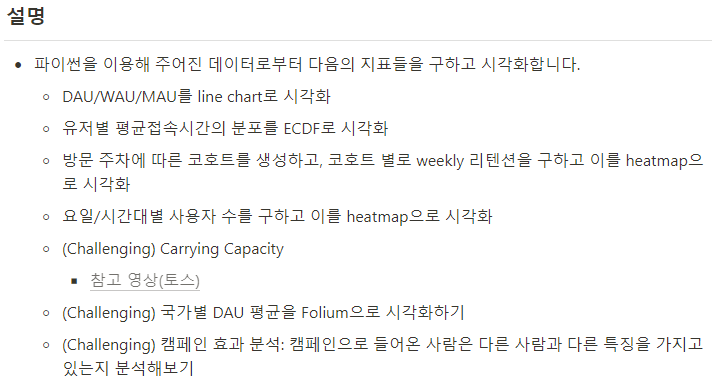

- posix time -> utc time으로 변환하기

In [85]:
# 데이터프레임에 한 열의 값을 바꾸기 위해서 def함수를 만들고 apply 적용
import pandas as pd
import datetime #날짜와 시간을 다루는 라이브러리
import pytz #다양한 시간대를 처리하기 위해 사용하는 라이브러리

# Posix 시간을 utc 시간으로 변환하는 함수
def posix_to_utc(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime)
    return utc_time

# Posix 시간을 UTC 지정한 로컬 시간대로 변환하는 함수
def posix_to_utc_local(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime) #posix -> utc시간대로
    local_timezone = pytz.timezone('America/New_York')  # 지역 시간대
    return utc_time.astimezone(local_timezone) # 그 지역 시간대로 변환

In [86]:
# posix time을 utf time으로 변환
df['visitStartTime'] = df['visitStartTime'].apply(posix_to_utc)
df['visitStartTime']

0        2016-09-02 15:33:05
1        2016-09-03 05:22:27
2        2016-09-03 01:16:26
3        2016-09-03 05:40:13
4        2016-09-02 13:23:20
                 ...        
903648   2017-01-04 18:32:30
903649   2017-01-04 15:29:58
903650   2017-01-04 10:40:34
903651   2017-01-05 05:07:44
903652   2017-01-05 00:01:14
Name: visitStartTime, Length: 903653, dtype: datetime64[ns]

1) DAU/WAU/MAU Line chart 시각화

In [102]:
# DAU구하기
df.groupby(df['visitStartTime'].dt.date)[['fullVisitorId']].nunique()

,fullVisitorId
visitStartTime,
2016-08-01,1197
2016-08-02,1799
2016-08-03,2481
2016-08-04,2959
2016-08-05,2745
...,...
2017-07-29,1676
2017-07-30,1513
2017-07-31,2292


In [110]:
# df.groupby(df['visitStartTime'].dt.week)[['fullVisitorId']].nunique()

In [107]:
display(df.groupby(df['visitStartTime'].dt.year)[['fullVisitorId']].count())
display(df.groupby(df['visitStartTime'].dt.year)[['fullVisitorId']].nunique())

,fullVisitorId
visitStartTime,
2016,436085
2017,467568


,fullVisitorId
visitStartTime,
2016,354569
2017,365529


2) 유저별 평균접속시간

In [165]:
#  hour 칼럼 추가가
df['visitHour'] = df['visitStartTime'].dt.hour

In [ ]:
# 평균? 가장 빈도가 많은 시간대?
# df.groupby('fullVisitorId')[['visitHour']]

3) 방문 주차에 따른 코호트를 형성하고, weekly 리텐션을 구하고 히트맵으로 시각화하기

In [ ]:
df['visitStartTime'].dt.week

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.rcParams['figure.figsize'] = [10,8]
# plt.pcolor('pivot table')
# # 또는 sns.heatmap()
# # 피벗테이블의 df를 pandas를 이용해 표현도 가능 df.style.background_gradient
# plt.title('Weekly Retention', fontsize=20)
# plt.xlabel('week', fontsize=14)
# plt.ylabel('visit', fontsize=14)
# plt.colorbar()

4. 요일/ 시간대별 이용자수를 구하고 시각화

In [ ]:
# 요일별 칼럼, 시간대별 칼럼 추가? -> 그룹화해서 이용자 수 구하기

5) 국가별 dau

In [ ]:
# 국가별로 그룹화하여 계산

6) 캠페인 효과 분석

In [ ]:
# 캠페인을 통해 방문했다는 것을 어떤 칼럼을 보고 알 수 있는지 모르겠네요..

In [ ]:
# trafic 칼럼 데이터 확인
a = []
for i in df.columns :
    if 'trafficSource' in i :
        a.append(i)
        
df[a].notna().sum()
# source, medium

trafficSource_campaign                               903653
trafficSource_source                                 903653
trafficSource_medium                                 903653
trafficSource_keyword                                400724
trafficSource_adwordsClickInfo.criteriaParameters    903653
trafficSource_isTrueDirect                           274005
trafficSource_referralPath                           330941
trafficSource_adwordsClickInfo.page                   21460
trafficSource_adwordsClickInfo.slot                   21460
trafficSource_adwordsClickInfo.gclId                  21561
trafficSource_adwordsClickInfo.adNetworkType          21460
trafficSource_adwordsClickInfo.isVideoAd              21460
trafficSource_adContent                               10946
trafficSource_campaignCode                                1
dtype: int64

In [ ]:
df[['trafficSource_source','trafficSource_medium']]

,trafficSource_source,trafficSource_medium
0,google,organic
1,google,organic
2,google,organic
3,google,organic
4,google,organic
...,...,...
903648,youtube.com,referral
903649,youtube.com,referral
903650,youtube.com,referral
903651,facebook.com,referral


In [ ]:
# 어떤 값들이 있는지 확인
display(df['trafficSource_campaign'].unique())
display(df['trafficSource_referralPath'].unique())
display(df['trafficSource_adwordsClickInfo.adNetworkType'].unique())
display(df['trafficSource_keyword'].unique())

array(['(not set)', 'AW - Dynamic Search Ads Whole Site',
       'Data Share Promo', 'AW - Electronics', 'test-liyuhz',
       'AW - Accessories',
       'Retail (DO NOT EDIT owners nophakun and tianyu)', 'AW - Apparel',
       'All Products', 'Data Share'], dtype=object)

array([nan, '/', '/corp/google.com/study/incentives/working-with-perks',
       ..., '/BB1QfReObs', '/mail/mu/mp/118/', '/mail/mu/mp/509/'],
      dtype=object)

array([nan, 'Google Search', 'Search partners'], dtype=object)

array(['(not provided)', 'google + online', nan, ...,
       'www.google.com bag', 'Google store usar',
       'google shirt buy online'], dtype=object)